## Reading the saved dataset into pandas dataframe

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [2]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### 1: [10pt]

#### (a) Report the percentage of the missing data and write your own code to remove the observations with missing values '?'.

I went through the data file to see which columns had the '?' in them- turns out it was only the Horsepower column, so I counted the rows where horsepower was assigned '?' and reported the percentage

In [3]:
df.shape

(398, 9)

In [4]:
#counting rows where data is missing
missing_count = df[df['horsepower']=='?'].shape[0]
#calculating percentage
percentage = (missing_count/df.shape[0])*100
percentage

1.507537688442211

In [5]:
#drop rows with '?' in the horsepower column
df.drop(df[df['horsepower']=='?'].index,inplace=True)
df.shape[0]

392

#### (b) Verify that appropriate data types have been assigned to each column of the dataframe and modify as necessary.

Using the dtypes attribute, I found out the data type of every attribute and modified the Horsepower attribute's data type to be float instead of object

In [6]:
#check datatypes of columns
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [7]:
#change horsepower type
df['horsepower']=df['horsepower'].astype('float64')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

#### (c) If there are any obvious data errors in 'car_name', please correct them (eg. "volkswagen" and "volkswagon" should be the same).

To check for the errors, I first re-formatted the car_name column of that dataset to only include the make of the car (eg. Chevrolet, Buick etc.) I then used the groupby function to group together cars of the same make, just to see the different makes and possible data errors

In [8]:
#processing car_name column
df['car_name'] = df['car_name'].apply(lambda x: x.split()[0])
df.head()
df.groupby('car_name').count()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
car_name,,,,,,,,
amc,27,27,27,27,27,27,27,27
audi,7,7,7,7,7,7,7,7
bmw,2,2,2,2,2,2,2,2
buick,17,17,17,17,17,17,17,17
cadillac,2,2,2,2,2,2,2,2
capri,1,1,1,1,1,1,1,1
chevroelt,1,1,1,1,1,1,1,1
chevrolet,43,43,43,43,43,43,43,43
chevy,3,3,3,3,3,3,3,3


As we can see, there are a couple of glaring errors, which I fixed below

In [9]:
#fixing data errors
df.replace('vokswagen','volkswagen',inplace=True)
df.replace('vw','volkswagen',inplace=True)
df.replace('toyouta','toyota',inplace=True)
df.replace('mercedes','mercedes-benz',inplace=True)
df.replace('maxda','mazda',inplace=True)
df.replace('chevroelt','chevrolet',inplace=True)
df.replace('chevy','chevrolet',inplace=True)
df.replace('hi','ih',inplace=True)

#### (d) Next, plot the distribution of the # make of a car (for instance 'ford' is a make of a car), by processing the information provided under the 'car_name' attribute. For instance, 'chevrolet chevelle malibu' is a 'chevrolet' and you can write code to create a bar plot and show the count of observations for each make of a car such as 'ford', 'volkswagon', etc.

Finally, I grouped them by make again (had to reset the index because after using groupby, car_name's index is at a different level as you can see in the output of part (c) and we don't want it to be that way. I then used this bunched up data to make the bar plot.

<AxesSubplot:xlabel='car_name'>

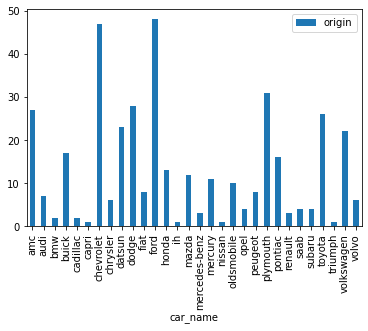

In [10]:
#plotting distribution
df.groupby('car_name').count().reset_index().plot.bar(x='car_name',y='origin')

### 2: [10pt]

#### (a) Lets assume that the goal is to classify the cars into 3 categories based on the weight attribute: light, medium, and heavy. Discover the threshold for each category, so that all samples are divided into three equally-sized bins.

When we talk about three equally sized bins, we're talking about dividing the weight range into 3 equally sized bins, not the total number of rows in your dataset. The thresholds for the bins can be calculated by dividing the difference between the maximum weight and the minimum weight by 3.

In [11]:
#dividing cars into 3 categories by weight
min_wt = min(df['weight'])
max_wt = max(df['weight'])
per_bin = (max_wt - min_wt)/3

bin1_start = min(df['weight'])
bin1_end = bin1_start + per_bin
bin2_end = bin1_end + per_bin

def label_wt(row):
    if bin1_start <= row['weight'] and row['weight'] <= bin1_end:
        return 'light'
    elif row['weight'] <= bin2_end:
        return 'medium'
    else:
        return 'heavy'
df['weight_categ'] = df.apply(lambda row: label_wt(row),axis=1)
df.head()
print("Thresholds: \nBin 1 = ",bin1_end,"\nBin 2 = ",bin2_end,"\nBin 3 = ",max_wt,"\nSize of each bin = ",per_bin)

Thresholds: 
Bin 1 =  2788.666666666667 
Bin 2 =  3964.333333333334 
Bin 3 =  5140.0 
Size of each bin =  1175.6666666666667


In [12]:
#here I'm checking to ensure that the cars which should be categorized as heavy are in that category
df[df['weight']>3964]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford,heavy
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet,heavy
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth,heavy
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac,heavy
25,10.0,8,360.0,215.0,4615.0,14.0,70,1,ford,heavy
...,...,...,...,...,...,...,...,...,...,...
231,15.5,8,400.0,190.0,4325.0,12.2,77,1,chrysler,heavy
232,16.0,8,351.0,149.0,4335.0,14.5,77,1,ford,heavy
265,17.5,8,318.0,140.0,4080.0,13.7,78,1,dodge,heavy
289,16.9,8,350.0,155.0,4360.0,14.9,79,1,buick,heavy


#### (b) Next, plot a histogram to show the count of observations in each bin.

Using the weight attribute, I grouped together all the rows belonging to the same weight category and used the count function to count the number of rows in each category. This count is reflected in the other attributes, so I can use any of the other attributes as the Y-axis.

<AxesSubplot:xlabel='weight_categ'>

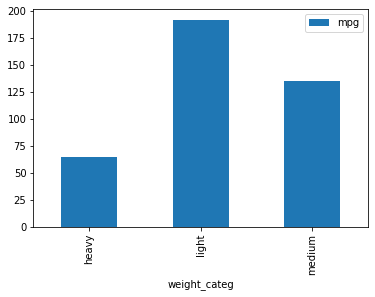

In [13]:
#plotting distribution
df.groupby('weight_categ').count().reset_index().plot.bar(x='weight_categ',y='mpg')

The following histogram plot is also accepted

array([[<AxesSubplot:title={'center':'heavy'}>,
        <AxesSubplot:title={'center':'light'}>],
       [<AxesSubplot:title={'center':'medium'}>, <AxesSubplot:>]],
      dtype=object)

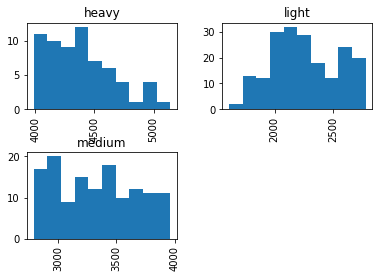

In [14]:
df.hist(by='weight_categ', column='weight')

### 3: [10pt]

#### (a) Create a 2D correlation matrix plot, similar to this example (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 and use seaborn library. You may use any published code to perform this.

The pandas correlation function, corr(), computes the correlation matrix for the numerical attributes of a given dataframe. Using this correlation matrix, we can plot a heatmap using the seaborn library.

In [15]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,weight_categ
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet,medium
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick,medium
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth,medium
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc,medium
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford,medium


<AxesSubplot:>

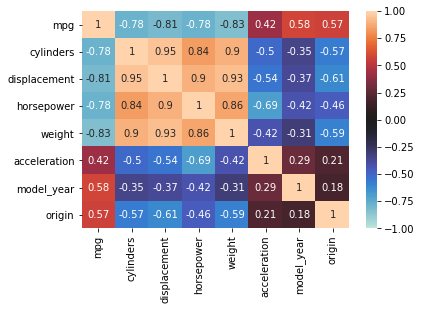

In [16]:
#creating 2D correlation matrix
import seaborn as sns
sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1, center= 0)

#### (b) Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation. (i.e., positive or negative correlation)

You can choose any two attributes and analyze their correlation- I picked the acceleration and the weight.

There is a negative correlation between acceleration of a car vs. its weight, which makes sense from a physics point of view that the lighter a car is, it will accelerate faster given the same force.

### 4: [20pt]

#### (a) Write a linear regression solver that can construct a polynomial regression function on a single variable for prediction of weight. Your code should use the Ordinary Least Squares (OLS) estimator  (i.e. the Maximum-likelihood estimator) to tune the model parameters. Write your fit and predict functions from scratch. Its recommended to use a library (e.g. numpy) for basic linear algebra operations (addition,multiplication and inverse).

Your code doesn't need to look exactly like this, however the fundamental logic in your code has to be the same as this.

The constructor initializes an array I use for the coefficients of the regression line.

The fit function is what calculates the coefficients, using the OLS estimation formula $w = (X^TX)^{-1} X^TY$\
This fit function needs to know the order of the polynomial, since Q5 asks us to fit regression lines of order 0-3. Based on the order, additional columns are added to the X matrix using numpy's c_ function that concatenates arrays and translates them into 2-D objects.

The predict function performs predictions on test data it receives as input.

The mse function calculates the mean squared error between the actual outcome and the predicted outcome.

In [17]:
class LinearRegression:
    #constructor to initialize the coefficient array
    def __init__(self):
        self.b = []
        
    def fit(self,x,y,order):
        N = len(x)
        if order == 0:
            X = np.c_[np.ones(N)]
        elif order == 1:
            X = np.c_[np.ones(N),x]
        elif order == 2:
            X = np.c_[np.ones(N),x,np.square(x)]
        else:
            X = np.c_[np.ones(N),x,np.square(x),np.power(x,3)]
#         print(X)
        self.b = X.T@y@np.linalg.inv(X.T@X)
        


    def predict(self,x):
#         print(self.b)
        prediction = []
        for i in range(len(x)):
            pred = self.b[0]
            for j in range(1,len(self.b)):
                pred+=self.b[j]*np.power(x[i],j)
            prediction.append(pred)
        return prediction
    
    def mse(self,y,prediction):
        s = 0
        for i in range(len(y)):
            s+=(y[i]-prediction[i])**2
        score = s/len(y)
        return score
    